Starting linear regression


C:\GitRepos\IntroToML\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\stav5\AppData\Local\Temp\ipykernel_33252\4088163028.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train.insert(0, 'Bias', 1)
C:\Users\stav5\AppData\Local\Temp\ipykernel_33252\4088163028.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

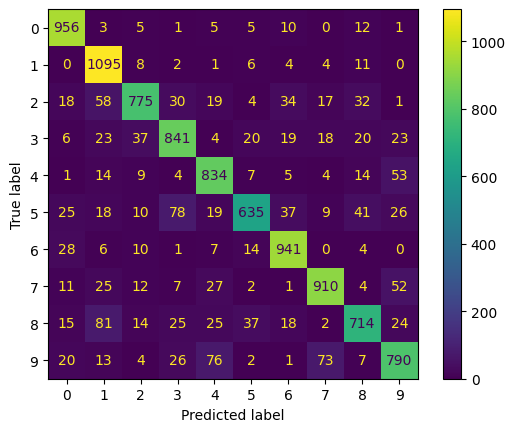

accuracy: 0.8491


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from linear_regression import train, test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def train(x_train, y_train):
    y_train_int = y_train.astype(int)
    y_train_onehot = pd.get_dummies(y_train_int).astype(int)

    # Convert DataFrame and Series to NumPy arrays
    X = x_train.to_numpy()
    y = y_train_onehot.to_numpy()

    w = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
    return w


def test(x, w):
    result_matrix = x.dot(w)
    x["preds"] = np.clip(np.round(result_matrix.apply(np.argmax, axis=1)).astype(int), 0, 9)



def run_linear_regression():
    print(f'Starting linear regression')

    # Fetch MNIST dataset
    mnist = fetch_openml('mnist_784')

    # Extract features (x) and labels (y)
    x, y = mnist.data, mnist.target

    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000)

    # Add bias
    x_train.insert(0, 'Bias', 1)
    x_test.insert(0, 'Bias', 1)

    w = train(x_train, y_train.astype(int))
    test(x_test, w)
    actual = y_test.astype(int)
    preds = x_test["preds"]

    plt.show()

    # generate confusion matrix
    test_cmatrix = confusion_matrix(actual, preds)
    test_display = ConfusionMatrixDisplay(test_cmatrix)
    test_display.plot()
    plt.savefig('confusion_matrix.png')

    plt.show()

    print(f'accuracy: {accuracy_score(actual, preds)}')

run_linear_regression()

